## IS455 - Week5 - Homework 4
### Working with Interactions
#### Jeremy Carnahan

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets
import traitlets
from IPython.display import display, clear_output

#### Using traitlets and/or widgets to build a notebook

Let's load in the UFO data and assign column headers.

In [3]:
ufos = pd.read_csv("ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

Let's take a look at the data structure.

In [4]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


As demonstrated in class, we'll replace NaNs with "unknown".

In [5]:
ufos = ufos.fillna({'country':'unknown', 'state':'unknown', 'shape':'unknown'})

Let's begin making the compents of our interactive scatter plot for the assignment.  We'll start by setting up our functions to call. 

For plotting purposes, it will best if we downsample the data to 1000 random samples as demonstrated in class.

In [6]:
nsamples = 1000
downSampleInds = np.random.choice(range(len(ufos)-1), nsamples, replace=False)
downSampleInds

array([47695,  5513, 32851, 50707, 45117, 36945, 25206, 30308, 33881,
       77367,  7079, 29500, 24090, 24419, 77205, 70418,  1535,  3826,
       78941, 79206,  4491, 20997,  6922, 16846, 38581, 11182, 27727,
       56824,  4197, 25457, 18860, 27650, 60449, 50073, 27610, 77821,
       68399, 33273, 44037, 40908, 69644, 53306, 40536,  3401,   632,
       34819, 63774,  2509, 79175, 67413, 15594, 68770, 30067, 70020,
       35872, 57551, 36828, 33775, 33817, 39727, 25363, 20525,  5651,
       70454, 33589, 12532, 19682, 30296, 34926, 50525, 27976, 45817,
       40326,  9574, 42990, 30442, 63854, 41497, 51158, 46387, 36081,
       26478, 33498, 38313, 63027, 36786, 26593, 19705, 48888, 24004,
       23674, 12908, 24482, 38487, 11470, 80109, 67570, 33245, 17038,
       18498, 55995,  3061, 65857, 71599,  3134, 54182, 45352, 35801,
       36955, 28082, 49685, 41334, 20251, 12124, 52470,  3014,  6050,
       34854, 40927, 66511, 77020,  5892, 75069,  3564, 66423, 20689,
       72169, 51940,

In [7]:
ufosDS = ufos.loc[downSampleInds]

Below I tried to use a decreator with the ipywidgets.interact; however, I was unable to get these decorators to work with the .observe feature.  I ended up using ipywidgets.dropdown instead to create widget objects that were recognized by .observe further below. 

In [8]:
# @ipywidgets.interact(Catagorical = ['City', 'State', 'Country'])
# def select_cat(Catagorical):
#     if Catagorical == 'City':
#         return ufosDS['city']
#     elif Catagorical == 'State':
#         return ufosDS['state']
#     elif Catagorical == 'Country':
#         return ufosDS['country']
    
# @ipywidgets.interact(Numerical = ['Duration in Seconds', 'Latitude', 'Longitude'])
# def select_num(Numerical):
#     if Numerical == 'Duration in Seconds':
#         return np.log10(ufosDS['duration_seconds'])
#     elif Numerical == 'Latitude':
#         return ufosDS['latitude']
#     elif Numerical == 'Longitude':
#         return ufosDS['longitude']
    

I have chosen here to use just the 'State' and 'Country' catagorical options for this widget as the 'City' category crowded the x-axis label to the point that the scatter plot was almost meaningless.  

In [9]:
def plot_selections(x_axis, y_axis, color):
    fig, ax = plt.subplots(1,1, figsize=(20,4))
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_title('UFO Sightings by Geography')
    if x_axis == 'State':
        x_axis = 'state'
    if x_axis == 'Country':
        x_axis = 'country'
    
    if y_axis == 'Latitude':
        y_axis = 'latitude'
    if y_axis == 'Longitude':
        y_axis = 'longitude'    
    if y_axis == 'Duration in Seconds (Log)':
        ax.scatter(ufosDS[x_axis], np.log10(ufosDS['duration_seconds']), color=color)
    else:
        ax.scatter(ufosDS[x_axis], ufosDS[y_axis], color=color)     

In [10]:
dropdown_cat = ipywidgets.Dropdown(
    value='State', 
    options=['State', 'Country'], 
    description='Catagorical')

dropdown_num = ipywidgets.Dropdown(
    value='Duration in Seconds (Log)', 
    options=['Duration in Seconds (Log)', 'Latitude', 'Longitude'], 
    description='Numerical')

# Color picker widget found on ipywidget.readthedocs here:
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html 
color_picker = ipywidgets.ColorPicker(value='#ff0000', description='Choose Color')

In [11]:
def cat_update(change):
    clear_output()
    display(ipywidgets.HBox([dropdown_cat, dropdown_num, color_picker]))
    plot_selections(change['new'], dropdown_num.value, color_picker.value)

def num_update(change):
    clear_output()
    display(ipywidgets.HBox([dropdown_cat, dropdown_num, color_picker]))
    plot_selections(dropdown_cat.value, change['new'], color_picker.value)

def color_update(change):
    clear_output()
    display(ipywidgets.HBox([dropdown_cat, dropdown_num, color_picker]))
    plot_selections(dropdown_cat.value, dropdown_num.value, change['new'])
    
dropdown_cat.observe(cat_update, 'value')
dropdown_num.observe(num_update, 'value')
color_picker.observe(color_update, 'value')

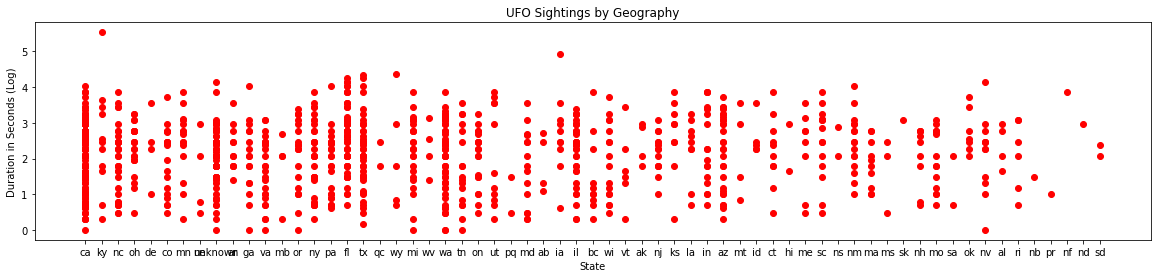

In [12]:
plot_selections('State', 'Duration in Seconds (Log)', '#ff0000')
ipywidgets.HBox([dropdown_cat, dropdown_num, color_picker])

#### Build a second widget that displays binned, aggregate values of a column where you can change:
* Field to 'bin'
* For numerical variables the number of bins

We will continue with the same UFO dataset, so our prior data clenzing is still valid for this widget.  Additionally, since we will be creating a subset via aggregation, I've elected to go back to using the full UFO dataset rather than the down-sampled dataset from the last exercise. However, we still need to choose and create some aggregate subsets of the data.  

I found a useful conversion in Pandas to convert a date & timestamp to just a date on StackExchange:
Solution provided by 'jezrael' here:  https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas

In [13]:
ufos['date'] = pd.to_datetime(ufos.date)
ufos['mdY_date'] = ufos['date'].dt.strftime('%m/%d/%Y')
ufos['year'] = ufos['date'].dt.strftime('%Y')

In [14]:
ufos.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude,mdY_date,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,10/10/1949,1949
1,1949-10-10 21:00:00,lackland afb,tx,unknown,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,10/10/1949,1949
2,1955-10-10 17:00:00,chester (uk/england),unknown,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,10/10/1955,1955
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,10/10/1956,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,10/10/1960,1960


Let's convert the years to an integer to make it easier to bin later in the exercise.

In [15]:
ufos['year'] = ufos['year'].astype(str).astype(int)

Let's explore some different types of aggregations and plotting.

Used examples from pandas docs page here to build bar plot from groupby:
https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html 

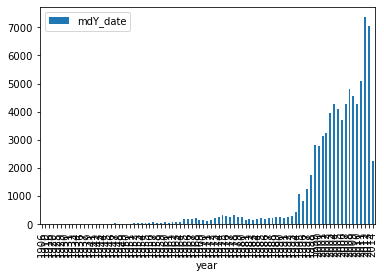

In [16]:
a = ufos.groupby('year', as_index=False)['mdY_date'].count().plot.bar('year')
plt.show()

Problem is that there is not much flexibility in the "bins" which requires complicated pd.cut operations that I don't think will work with with widgets.  I want to explore something more compatible with Pandas df.hist() method.  I'll first start by converting the year strings into integers so that we can automate the binning.

In [17]:
shapeYearcount_ = ufos.groupby('year', as_index=False)['mdY_date'].count()

In [18]:
shapeYearcount_.dtypes

year        int64
mdY_date    int64
dtype: object

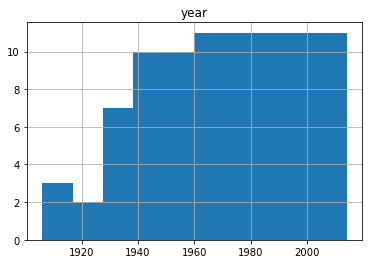

In [19]:
shapeYearcount_.hist(column='year', bins=10)
plt.show()

Let's pull together a few more UFO stats for more choices later in our plot.

In [20]:
shapeYearmax_ = ufos.groupby('year', as_index=False)['mdY_date'].max()
shapeYearmin_ = ufos.groupby('year', as_index=False)['mdY_date'].min()

Now let's pull this together into an interactive widget.  We'll start with the same structure we used in Exercise #1 by creating some reusable functions for the .observe of traitlets.

In [21]:
def plot_hist(stat, bin_num, color):
    if stat == 'count':        
        shapeYearcount_.hist(column='year', bins=bin_num, color=color)
    if stat == 'max':
        shapeYearmax_.hist(column='year', bins=bin_num, color=color)
    if stat == 'min':
        shapeYearmin_.hist(column='year', bins=bin_num, color=color)


In [22]:
dropdown_stat = ipywidgets.Dropdown(
    value='count', 
    options=['count', 'max', 'min'], 
    description='UFO Stat')

# This blog by Patrick Steegstra was useful in finding "continuous_update=False" parameter for making the plot draw
# only when I released the mouse button on the bins_slider widget.
# Blog can be found here:  https://kapernikov.com/ipywidgets-with-matplotlib/ 
bins_slider = ipywidgets.IntSlider(value=1, min=5, max=50, step=1, description='Year Binning', continuous_update=False)

# Color picker widget found on ipywidget.readthedocs here:
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html 
color_picker2 = ipywidgets.ColorPicker(value='#ff0000', description='Choose Color')

In [23]:
def stat_update(change):
    clear_output()
    display(ipywidgets.HBox([dropdown_stat, bins_slider, color_picker2]))
    plot_hist(change['new'], bins_slider.value, color_picker.value)

def bins_update(change):
    clear_output()
    display(ipywidgets.HBox([dropdown_stat, bins_slider, color_picker2]))
    plot_hist(dropdown_stat.value, change['new'], color_picker2.value)

def color2_update(change):
    clear_output()
    display(ipywidgets.HBox([dropdown_stat, bins_slider, color_picker2]))
    plot_hist(dropdown_stat.value, bins_slider.value, change['new'])
    
dropdown_stat.observe(stat_update, 'value')
bins_slider.observe(bins_update, 'value')
color_picker2.observe(color2_update, 'value')

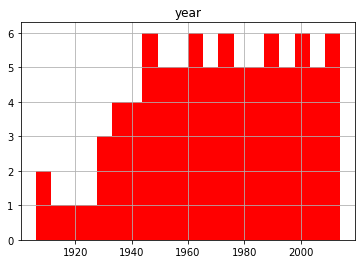

In [24]:
plot_hist('count', 20, '#ff0000')
ipywidgets.HBox([dropdown_stat, bins_slider, color_picker2])

After experimenting, it did seem logical to only allow the end user the ability to change the aggregate function on the UFO stats rather than mixing various fields together; therefore, I only chose 1 column per axis, but allowed interactive altering of both axises for more depth.  This was primarily because there were few numericals to apply a binning function to, and while we could somehow enumerate categoricals, bins of those numbers would be meaningless.  With more time, I would have liked to work on a smoother re-draw of the plots, and explore and extract more meaningful statistics to apply to the aggregate data output.  